Dias-Alves, T., Mairal, J., Blum, M.G.B., 2018. Loter: A Software Package to Infer Local Ancestry for a Wide Range of Species. Mol Biol Evol 35, 2318–2326. https://doi.org/10.1093/molbev/msy126

In [14]:
import os
import allel
import numpy as np
import loter.locanc.local_ancestry as lc
import pandas as pd
import vcf
import matplotlib.pyplot as plt


In [ ]:
#run code/loter.sh to generate the reference and query vcfs

In [2]:
os.chdir("/master/nplatt/sch_man_nwinvasion/results/loter")

`vcf2npy` convert a VCF File to a numpy matrix with values 0, 1 and 2.

This is a function provided by the `loter`'s example notebook

In [3]:
def vcf2npy(vcfpath):
    callset = allel.read_vcf(vcfpath)
    haplotypes_1 = callset['calldata/GT'][:,:,0]
    haplotypes_2 = callset['calldata/GT'][:,:,1]
    
    m, n = haplotypes_1.shape
    mat_haplo = np.empty((2*n, m))
    mat_haplo[::2] = haplotypes_1.T
    mat_haplo[1::2] = haplotypes_2.T
    
    return mat_haplo.astype(np.uint8)

Read in vcf to numpy array of haplotypes (columns = variants, rows = haplotypes)

In [4]:
brazil_hs   = vcf2npy("auto_beagle_loter_brazil_ref.vcf")
rodhaini_hs = vcf2npy("auto_beagle_loter_rodhaini_ref.vcf")
query_hs    = vcf2npy("auto_beagle_loter_query.vcf")

run loter

In [5]:
res_loter = lc.loter_smooth(l_H         = [brazil_hs, rodhaini_hs], 
                            h_adm       = query_hs, 
                            num_threads = 24) 

In [6]:
print(res_loter.shape)

(288, 475081)


In [12]:
loter_df = pd.DataFrame(res_loter)

In [29]:
vcf_reader = vcf.Reader(open('auto_beagle_loter_query.vcf', 'r'))

In [30]:
samples = vcf_reader.samples

hap_ids = []
for sample in samples:
    hap_ids.append("{}_H1".format(sample))
    hap_ids.append("{}_H2".format(sample))


pos_ids = []
chrom_labels=[]
for record in vcf_reader:
    pos_ids.append("{}:{}".format(record.CHROM, record.POS))
    chrom_labels.append(record.CHROM)
    
#loter_df.index=hap_ids
#loter_df.columns=pos_ids

In [17]:
loter_df.to_csv("5br_vs_5rod_loter.csv", sep=",")

In [6]:
loter_df = pd.read_csv("5br_vs_5rod_loter.csv", sep=",")

In [18]:
loter_df

,SM_V7_1:302288,SM_V7_1:705190,SM_V7_1:705210,SM_V7_1:705322,SM_V7_1:705337,SM_V7_1:705340,SM_V7_1:705343,SM_V7_1:705389,SM_V7_1:705395,SM_V7_1:705396,...,SM_V7_7:19081315,SM_V7_7:19086933,SM_V7_7:19086979,SM_V7_7:19087032,SM_V7_7:19087089,SM_V7_7:19087103,SM_V7_7:19087106,SM_V7_7:19087132,SM_V7_7:19087217,SM_V7_7:19087225
Sro_female_2.2_CCTCTATC_H1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sro_female_2.2_CCTCTATC_H2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sro_male_1.1_ATCATTCC_H1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sro_male_1.1_ATCATTCC_H2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sro_male_2.1_CAAGGAGC_H1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sm.TZ_141.6.1_H2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sm.TZ_141.7.1_H1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sm.TZ_141.7.1_H2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sm.TZ_141.8.1_H1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
chroms = [ "SM_V7_1", 
           "SM_V7_2", 
           "SM_V7_3", 
           "SM_V7_4", 
           "SM_V7_5", 
           "SM_V7_6", 
           "SM_V7_7", ]

for chrom in chroms:
    last_index = len(chrom_labels) - 1 - chrom_labels[::-1].index(chrom) 
    chrom_ticks.append(last_index)

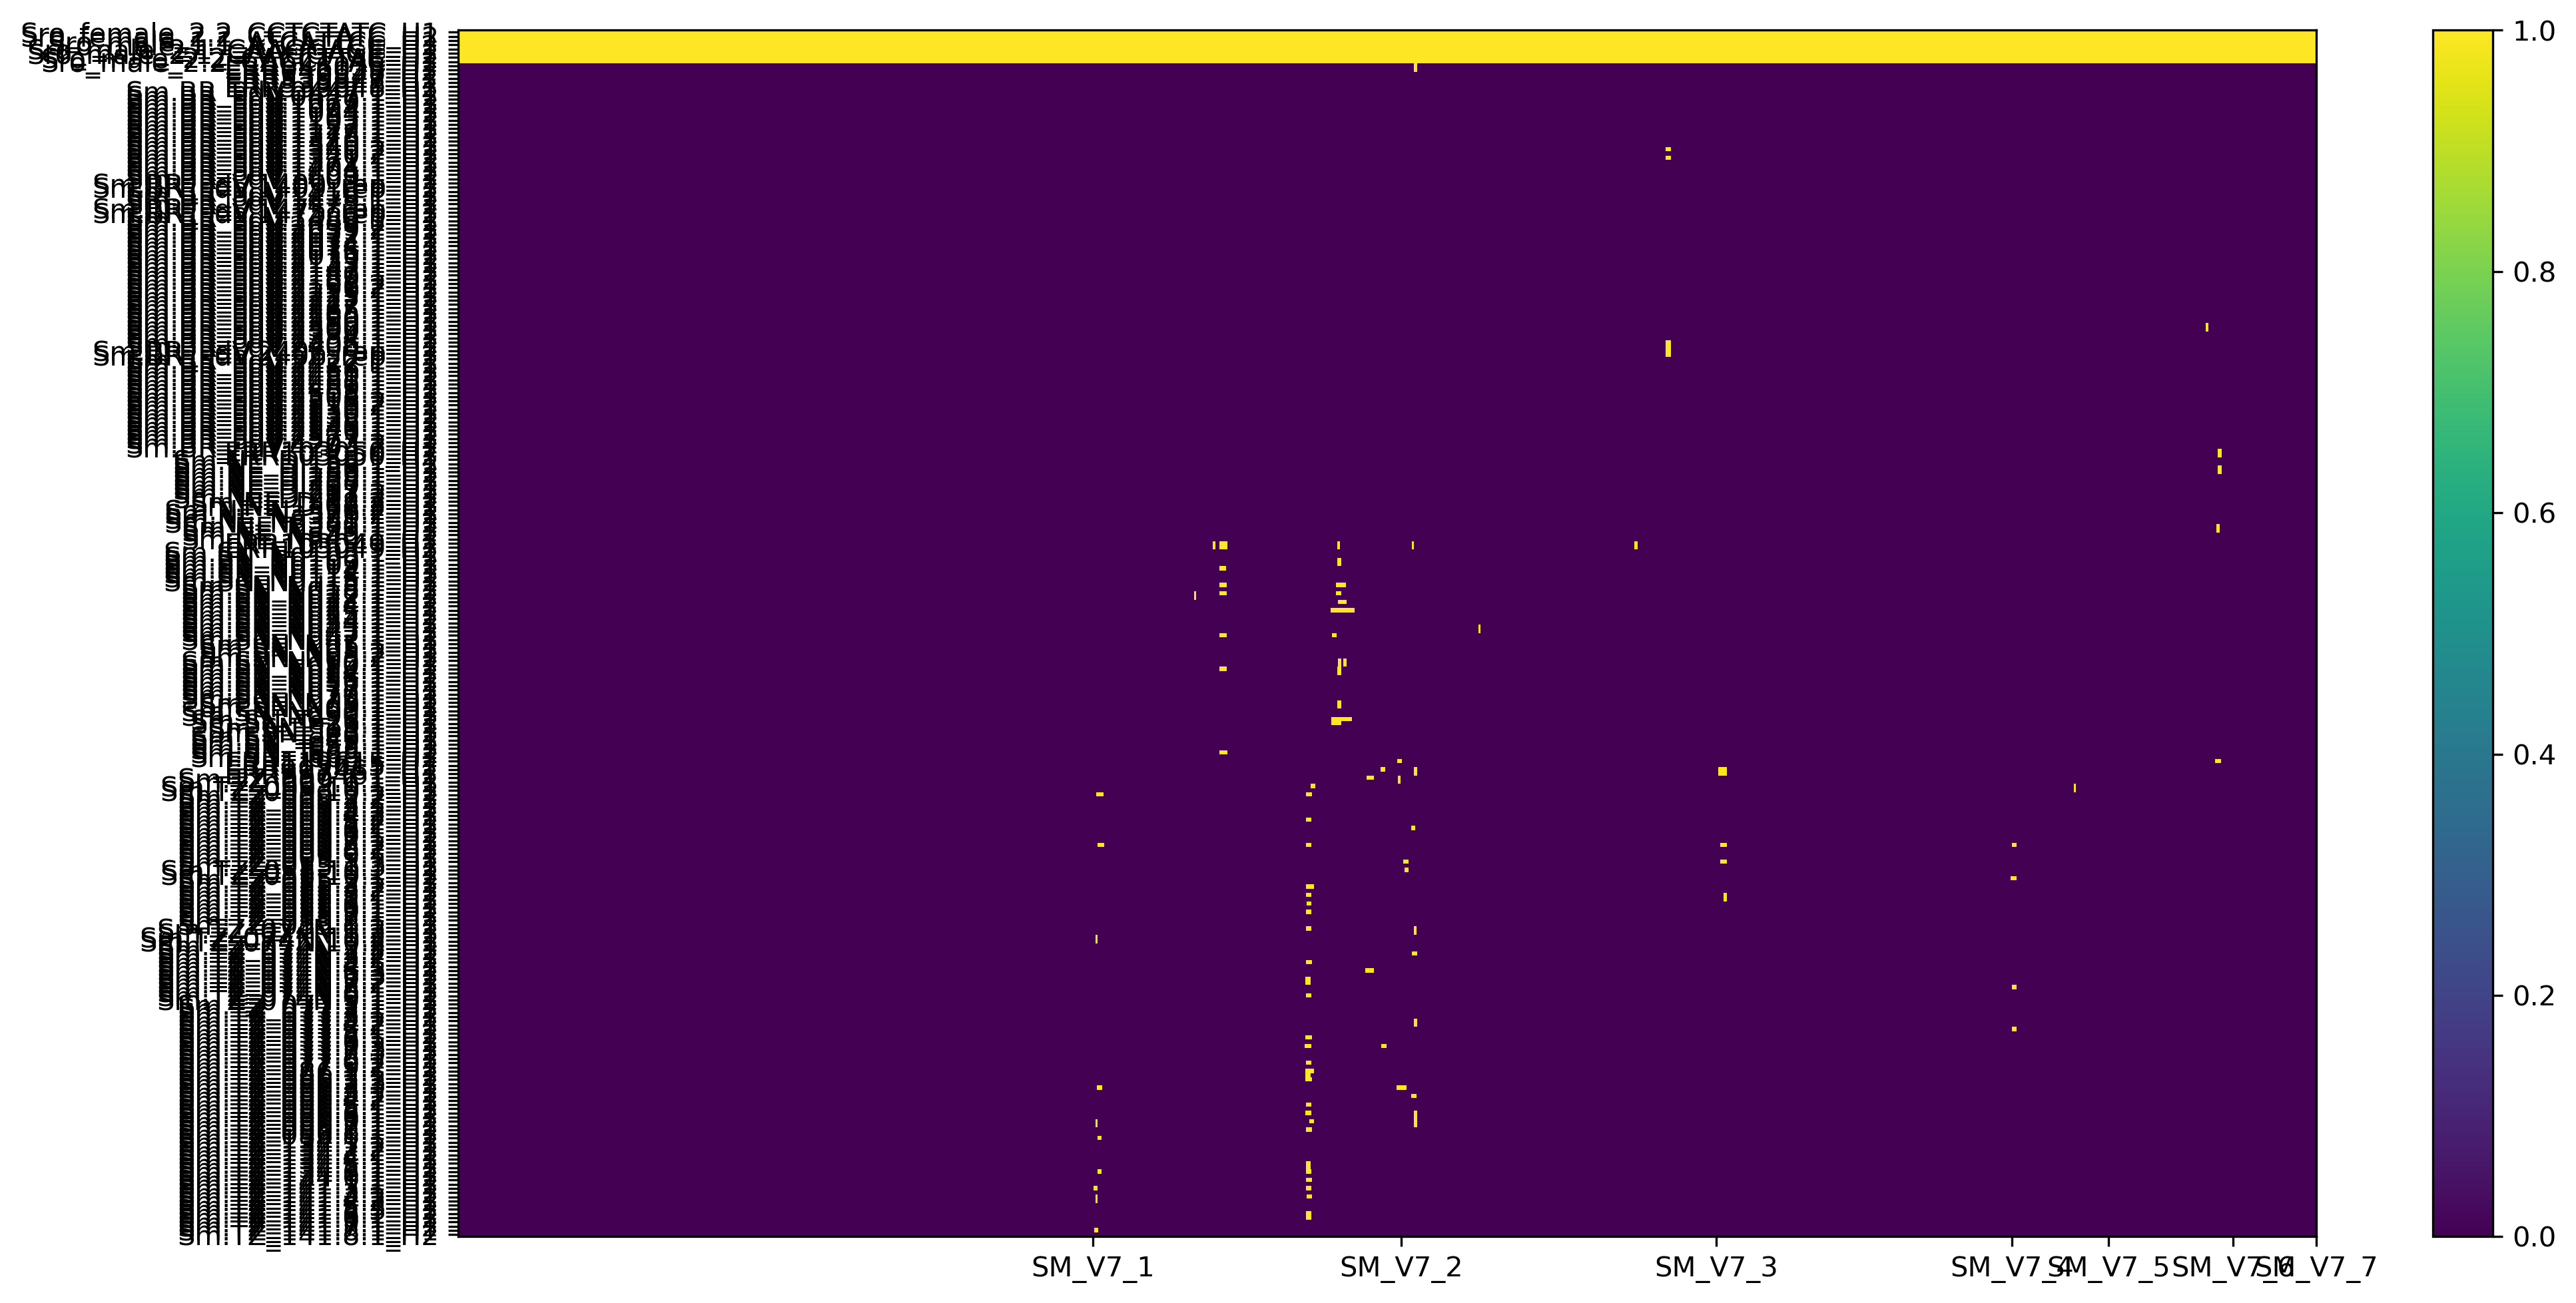

In [43]:
fig, ax = plt.subplots(figsize=(15,8), dpi= 300, facecolor='w', edgecolor='k')

#fig, q=plt.figure(figsize=(6,10), dpi= 300, facecolor='w', edgecolor='k')

ax.set_xticks(chrom_ticks)
ax.set_yticks(np.arange(len(hap_ids)))

ax.set_xticklabels(chroms)
ax.set_yticklabels(hap_ids)

#plt.figure(figsize=(20,10)) 
plt.imshow(res_loter, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.savefig("5br_vs_5rod_loter.svg")

In [68]:
rod_afs_in_tz = sums=np.array(loter_df[178:].sum(axis=0))/len(loter_df[178:])
rod_afs_in_tz.max()

0.2727272727272727

In [69]:
rod_afs_in_sm = sums=np.array(loter_df[8:].sum(axis=0))/len(loter_df[8:])
rod_afs_in_sm.max()

0.10714285714285714

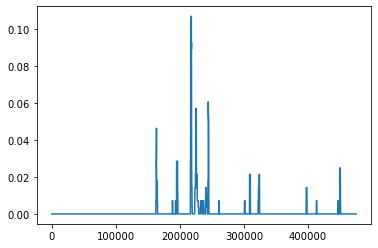

In [66]:
plt.plot(rod_afs_in_sm)
#plt.savefig("freq.png")

In [ ]:
len(rod_afs_in_sm[rod_afs_in_tz>0])/len(rod_afs_in_sm)

In [81]:
rod_afs_in_sm[rod_afs_in_sm>0].mean()

0.018469544391317812

In [86]:
rod_afs_in_tz[rod_afs_in_tz>0].mean()

0.047448527441726264

In [65]:
rod_afs_in_tz.max()
#rod_afs_in_sm.max()

0.2727272727272727

In [87]:
rod_afs_in_sm.mean()

0.001291636884777844

In [95]:
tz_afs=loter_df[178:].sum(axis=0)/len(loter_df[178:])

In [99]:
tz_afs[tz_afs>0.10].mean()

0.2517226203948196